<h4> Indian Stock Analysis</h4>

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline
from datetime import datetime


In [1]:
import pandas_datareader as pdr
import yfinance as yf

In [3]:
stck = ['BHARTIARTL.NS', 'TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS'] 
end_date = datetime.now()
start_date = datetime(end_date.year-1, end_date.month, end_date.day)

In [4]:
stock_data = {}
for ticker in stck:
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    stock_data[ticker] = data
    stock_data[ticker].columns = stock_data[ticker].columns.droplevel(1)
    stock_data[ticker].index.name = 'Date'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#Analysing the 'TCS.NS' Stock

In [20]:
tcs_data = stock_data['TCS.NS']
tcs_data.head(10)

Price,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 90 days,Select
Date,,,,,,,,,,
2024-08-21,4474.537598,4482.893869,4416.584205,4441.604057,1896990,NaN,NaN,NaN,NaN,Sell
2024-08-22,4425.874512,4483.827903,4421.155868,4482.893775,1829872,NaN,NaN,NaN,NaN,Sell
2024-08-23,4388.418457,4429.806671,4379.669046,4423.908127,1809253,NaN,NaN,NaN,NaN,Sell
2024-08-26,4426.317383,4475.176708,4409.162256,4413.094619,1844164,NaN,NaN,NaN,NaN,Sell
2024-08-27,4421.106445,4433.739257,4410.931360,4428.823804,930697,NaN,NaN,NaN,NaN,Sell
2024-08-28,4429.855957,4485.351623,4381.930282,4422.679586,1848058,NaN,NaN,NaN,NaN,Sell
2024-08-29,4435.508789,4478.961594,4384.584879,4384.584879,2133641,NaN,NaN,NaN,NaN,Sell
2024-08-30,4476.749023,4514.598013,4411.914003,4423.907901,3637222,NaN,NaN,NaN,NaN,Sell
2024-09-02,4444.602051,4510.420166,4435.705272,4498.623077,1216500,NaN,NaN,NaN,NaN,Sell


In [6]:
tcs_data.describe()

Price,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,3766.217847,3803.306995,3735.365569,3770.056432,2.458692e+06
std,433.651763,440.387822,429.674607,435.398344,1.169200e+06
min,3003.000000,3025.000000,2991.600098,3009.100098,0.000000e+00
25%,3411.708130,3438.580501,3387.749506,3415.666899,1.696638e+06
50%,3857.011475,3886.152681,3817.498147,3850.985743,2.228678e+06
75%,4127.671387,4171.538961,4090.969971,4139.078677,2.946624e+06
max,4476.749023,4514.598013,4435.705272,4498.623077,7.894300e+06


In [7]:
tcs_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-08-21 to 2025-08-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [104]:
returns.quantile(0.05)

Ticker
BHARTIARTL.NS   -0.022129
HDFCBANK.NS     -0.017494
ICICIBANK.NS    -0.016304
RELIANCE.NS     -0.018869
TCS.NS          -0.019963
Name: 0.05, dtype: float64

1. How the adjusted closing price of the 'tcs_data' has changed over time?

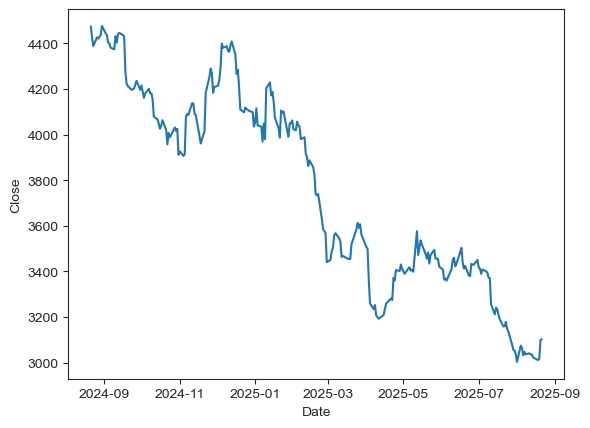

In [8]:
sns.lineplot(x=tcs_data.index, y=tcs_data['Close'], data= tcs_data)
plt.show()

2. Analysing each stock closing prices over 6 months from Nov 24, also highlighting how they were impacted from the US Presidential Election and Stock Market Crash of April 2025.

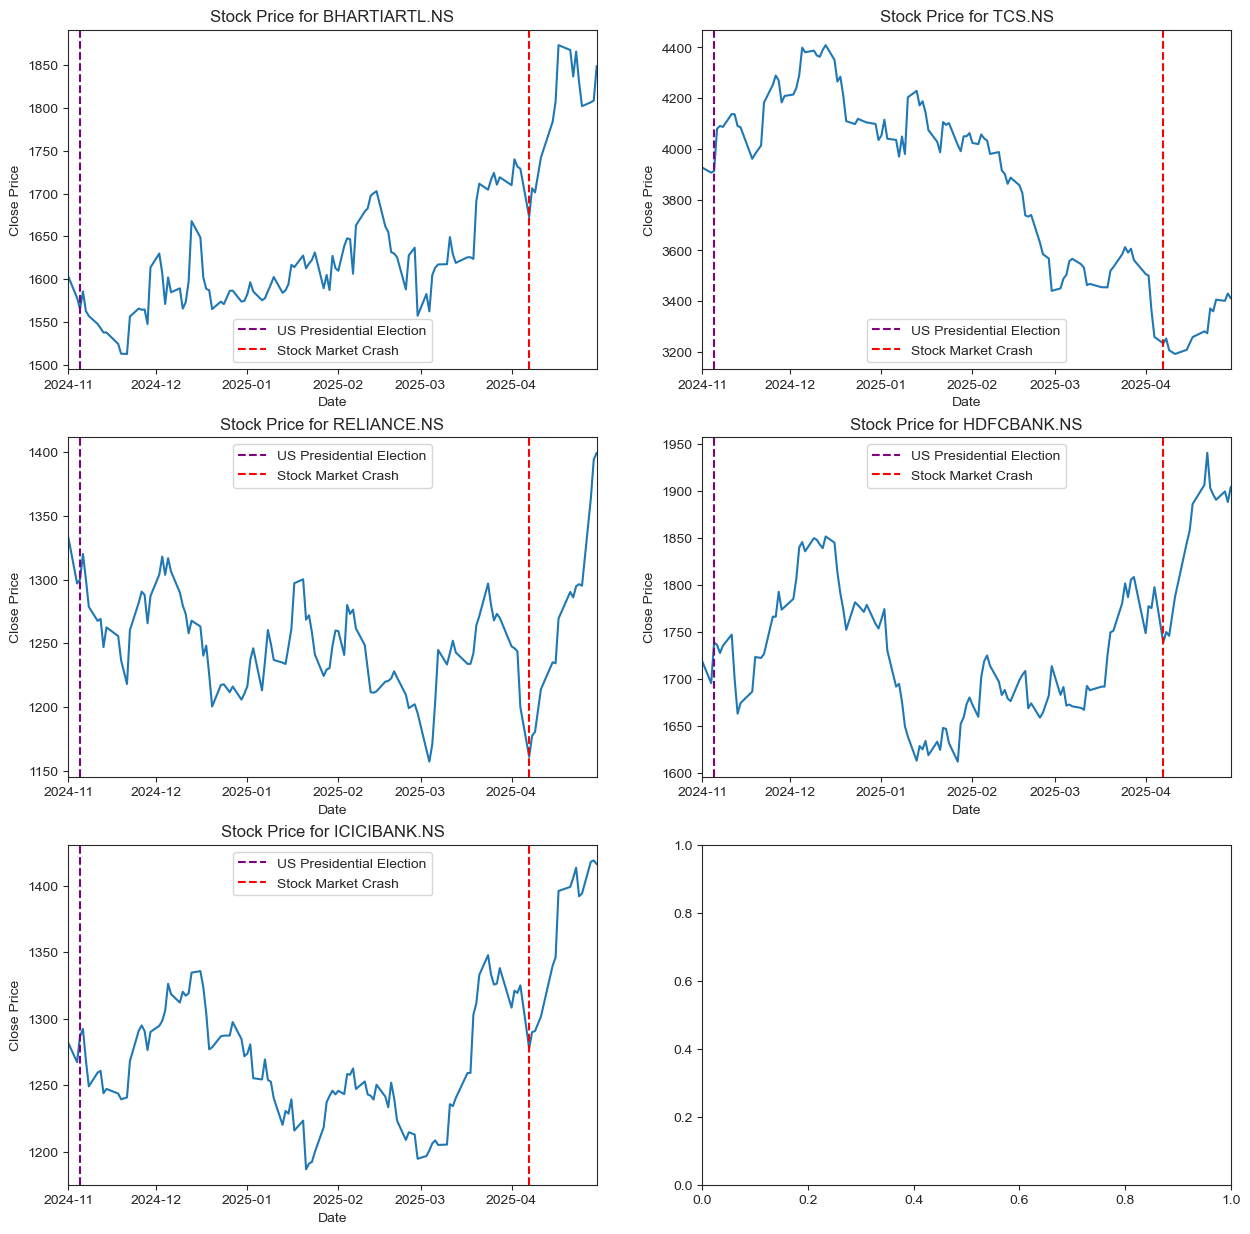

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=False, sharey=False)
axes= axes.flatten()
for i, stock in enumerate(stck):
    ax = axes[i]
    df = stock_data[stock]
    six_month = df.loc['2024-11':'2025-04']
    sns.lineplot(x=six_month.index, y=six_month['Close'], data=six_month, linestyle='-',ax=ax)
    ax.set_title(f'Stock Price for {stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.set_xlim(six_month.index[0], six_month.index[-1])
    ax.axvline(x=six_month.index[0] + pd.Timedelta(days=4), color='purple', linestyle='--', label='US Presidential Election')
    ax.axvline(x=six_month.index[0] + pd.Timedelta(days=157), color='red', linestyle='--', label='Stock Market Crash')
    ax.legend()
    
plt.show()   
    


3. How volume of the 'tcs_data' has fluctuated over the past year?

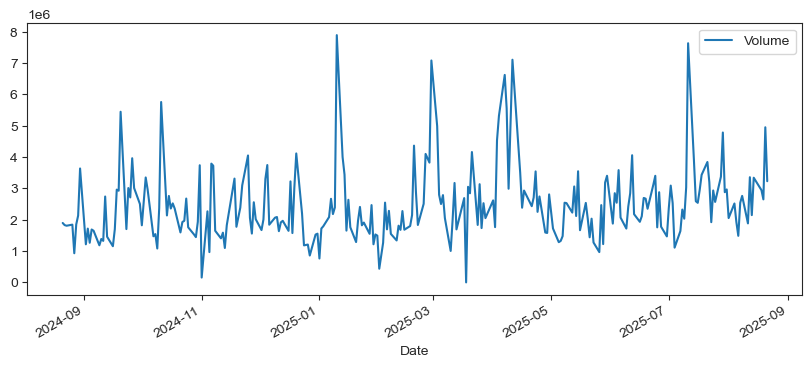

In [9]:
tcs_data['Volume'].plot(legend=True, figsize=(10,4))
plt.show()

In [3]:
#Calculating the Simple Moving Averages(MA).

In [10]:
days= [10,20,50,90]
for day in days:
    column_name = 'MA for %s days' %(str(day))
    tcs_data[column_name] = tcs_data['Close'].rolling(window=day).mean()

4. How different days Moving Averages have performed over the past year with regards to the closing price?

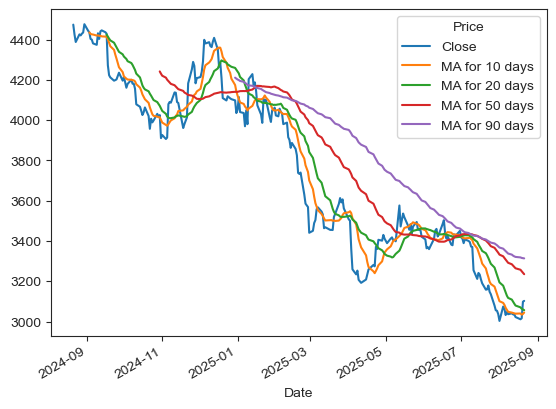

In [11]:
tcs_data[['Close', 'MA for 10 days', 'MA for 20 days',
          'MA for 50 days','MA for 90 days']].plot(subplots=False)
plt.show()

In [4]:
# Adding a Column to define whether to buy or sell a stock if 'MA for 50 days' crosses its 'MA for 90 days'.

In [19]:
tcs_data['Select'] = tcs_data.apply(lambda x: 'Buy' if x ['MA for 50 days'] > x ['MA for 90 days'] else 'Sell', axis=1)
tcs_data[tcs_data['Select']=='Buy'].head()

Price,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 90 days,Select
Date,,,,,,,,,,
2025-01-16,4145.262207,4231.689785,4131.022180,4198.183159,2637705,4101.226099,4103.177344,4167.468657,4163.137343,Buy
2025-01-17,4074.138184,4109.996976,4050.183123,4109.305297,1761466,4104.599268,4096.388721,4170.676978,4159.802083,Buy
2025-01-20,4028.204102,4095.376815,4018.622125,4095.376815,1287799,4103.861914,4092.309692,4169.649468,4155.319618,Buy
2025-01-21,3986.764404,4061.000302,3980.985458,4045.491300,1971591,4105.553784,4086.749963,4167.571426,4150.688024,Buy
2025-01-22,4106.045898,4112.516042,3995.012807,4000.742313,2409223,4111.280029,4086.109680,4167.955874,4146.962872,Buy


5. Calculating the daily returns of 'tcs_data' closing prices.

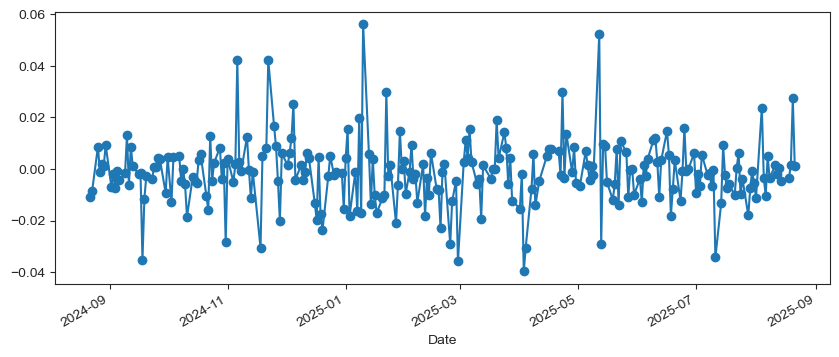

In [57]:
tcs_data['Daily Return'] = tcs_data['Close'].pct_change()
tcs_data['Daily Return'].plot(marker='o', figsize=(10,4))
plt.show()

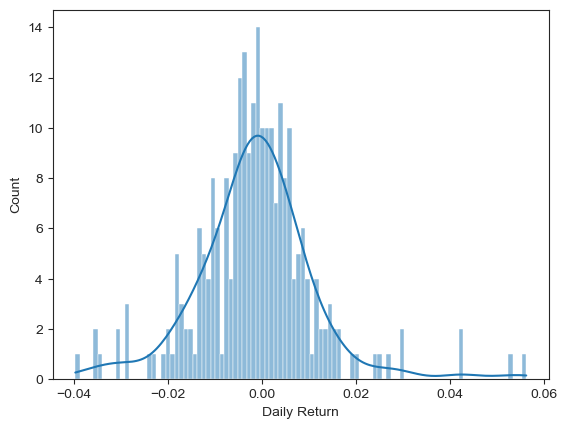

In [58]:
sns.histplot(tcs_data['Daily Return'].dropna(), bins=100, kde=True)
plt.show()

In [5]:
#Creating the dataframe of all stocks and their closing prices.

In [59]:
closing_df = yf.download(stck, start=start_date, end=end_date, auto_adjust=True)['Close']
closing_df.head()

[*********************100%***********************]  5 of 5 completed


Ticker,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-08-21,1451.317139,1608.109131,1165.854126,1492.713257,4474.537598
2024-08-22,1474.027222,1613.549316,1181.979736,1492.165405,4425.874512
2024-08-23,1494.258179,1607.367310,1194.284790,1494.008057,4388.418457
2024-08-26,1501.001831,1622.105103,1204.009766,1506.582886,4426.316895
2024-08-27,1510.125488,1619.929077,1216.959839,1494.481201,4421.106445


In [60]:
returns = closing_df.pct_change()
returns.head()

Ticker,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-08-21,NaN,NaN,NaN,NaN,NaN
2024-08-22,0.015648,0.003383,0.013832,-0.000367,-0.010876
2024-08-23,0.013725,-0.003831,0.010411,0.001235,-0.008463
2024-08-26,0.004513,0.009169,0.008143,0.008417,0.008636
2024-08-27,0.006078,-0.001341,0.010756,-0.008033,-0.001177


In [6]:
#Analysing the relationship between two major companies' daily stock returns.

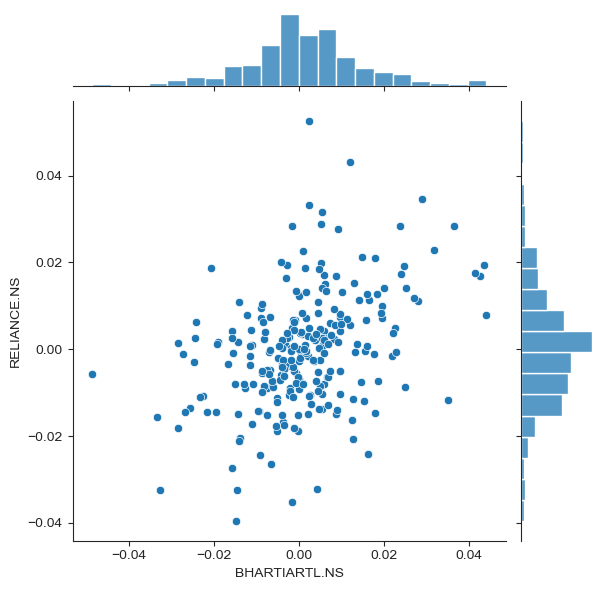

In [61]:
sns.jointplot(x='BHARTIARTL.NS', y='RELIANCE.NS', data= returns, kind='scatter')
plt.show()

Roughly linear with a good presence of outlier, highlighting how they are related.

6. Analysing the daily returns of each stock by contemplating their relationships among themselves.

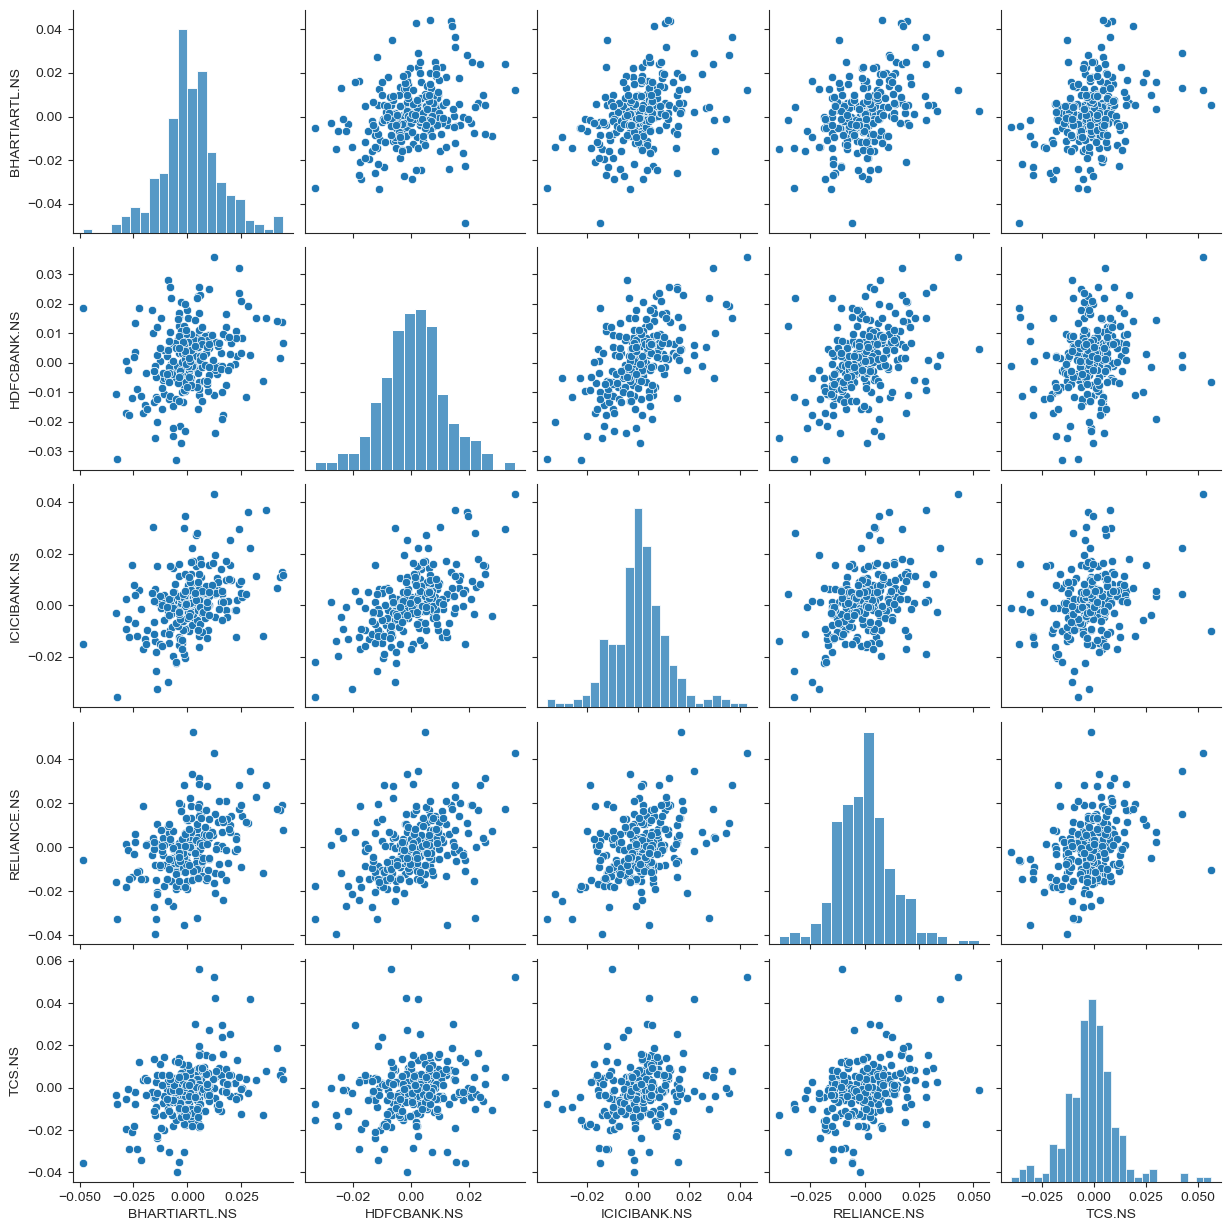

In [62]:
sns.pairplot(returns.dropna())
plt.show()

We find that 'ICICIBANK.NS' AND 'HDFC.NS' have a fairly good linear reltionship with each other. This highlights how strong they are correlated to the Indian Economy as a whole Banking sector.

In [7]:
#Analysing the same but with control of different graphs.

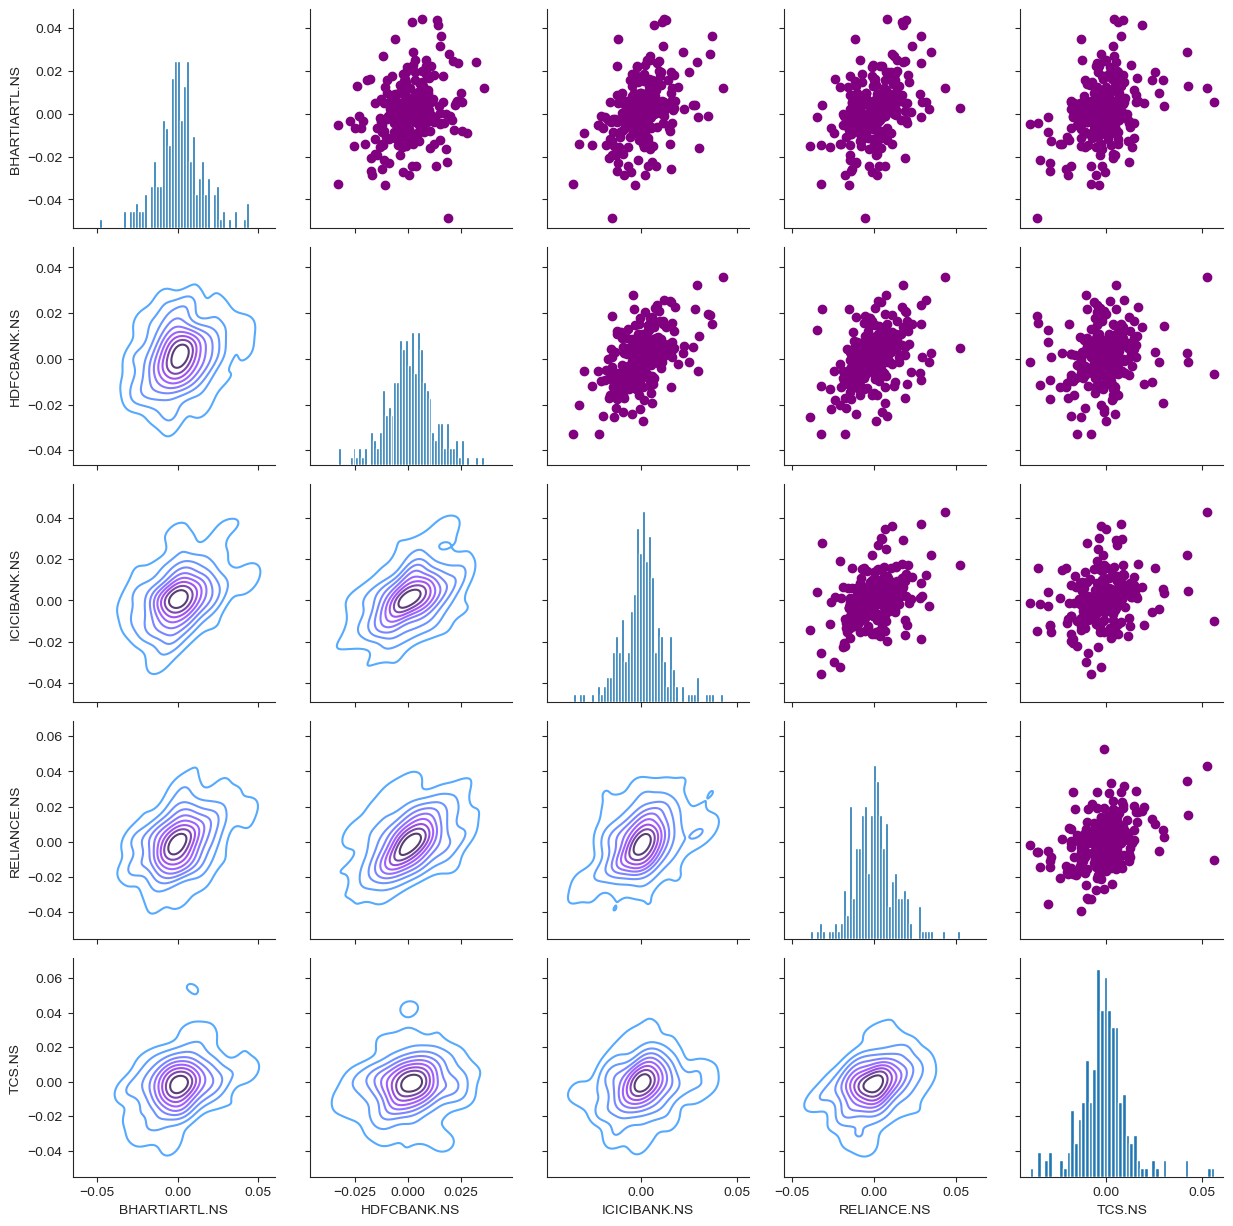

In [63]:
ret_fig= sns.PairGrid(returns.dropna())
ret_fig.map_upper(plt.scatter, color='purple')
ret_fig.map_lower(sns.kdeplot, cmap='cool_d')
ret_fig.map_diag(plt.hist, bins=50)
plt.show()

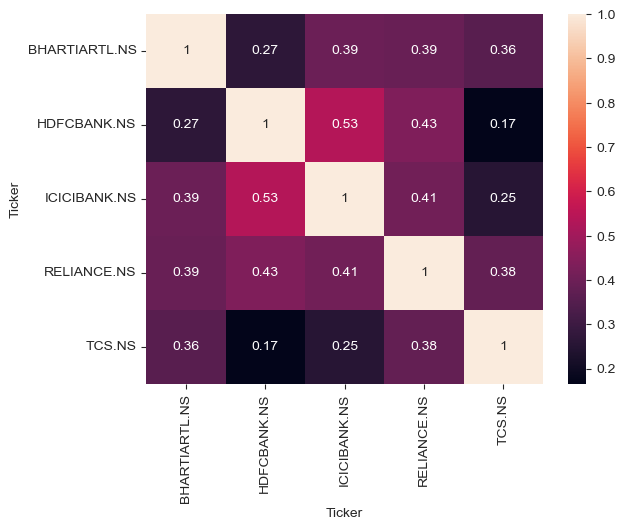

In [64]:
sns.heatmap(returns.dropna().corr(), annot=True)
plt.show()

The same can be explained by this heatmap where there is strong value of correlation between 'ICICIBANK.NS' and 'HDFCBANK.NS' stocks.

7. How different stocks can be analysed by their risk undertakings?

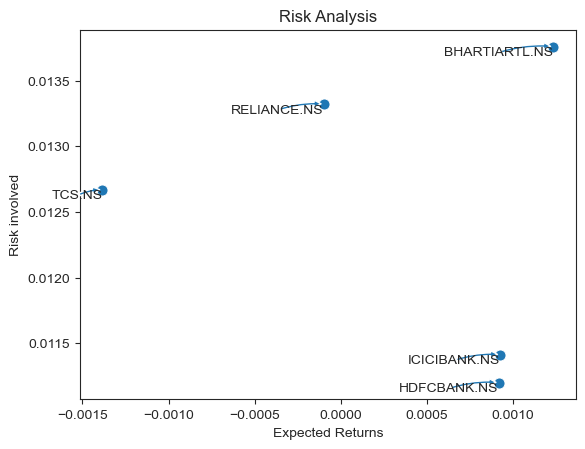

In [102]:
rets = returns.dropna()
area= np.pi*20
sns.scatterplot(x=rets.mean(), y=rets.std(), data= rets, s=area)
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext=(0.002,0.0004),
        textcoords='offset points', ha='right', va='top',
        arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.1"))
plt.title('Risk Analysis')
plt.xlabel('Expected Returns')
plt.ylabel('Risk involved')
plt.figsize=(4,4)
plt.show()

We find 'BHARTIARTL.NS' to be fairly of high risk and high expected returns. However the confidence that Indian Public have in the banking sector of the economy and thereby on the Indian economy can be explained by 'ICICIBANK.NS' and 'HDFCBANK.NS' good performing risk analysis. 

Thank You!